In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
myDataDir = r'C:\Users\Asus\Downloads\Compressed\mrlEyes_2018_01\prepare data';

In [4]:
os.listdir(myDataDir)

['alarm.wav', 'test', 'train']

In [5]:
from matplotlib.image import imread

In [6]:
test_path = myDataDir+'/test/';

In [7]:
train_path = myDataDir+'/train/'

In [8]:
test_path

'C:\\Users\\Asus\\Downloads\\Compressed\\mrlEyes_2018_01\\prepare data/test/'

In [9]:
os.listdir(train_path)

['close eyes', 'open eyes']

In [10]:
os.listdir(test_path)

['close eyes', 'open eyes']

In [11]:
os.listdir(test_path+'close eyes')

['s0001_00001_0_0_0_0_0_01.png',
 's0001_00002_0_0_0_0_0_01.png',
 's0001_00003_0_0_0_0_0_01.png',
 's0001_00004_0_0_0_0_0_01.png',
 's0001_00005_0_0_0_0_0_01.png',
 's0001_00006_0_0_0_0_0_01.png',
 's0001_00007_0_0_0_0_0_01.png',
 's0001_00008_0_0_0_0_0_01.png',
 's0001_00009_0_0_0_0_0_01.png',
 's0001_00010_0_0_0_0_0_01.png',
 's0001_00011_0_0_0_0_0_01.png',
 's0001_00012_0_0_0_0_0_01.png',
 's0001_00013_0_0_0_0_0_01.png',
 's0001_00014_0_0_0_0_0_01.png',
 's0001_00015_0_0_0_0_0_01.png',
 's0001_00016_0_0_0_0_0_01.png',
 's0001_00017_0_0_0_0_0_01.png',
 's0001_00018_0_0_0_0_0_01.png',
 's0001_00019_0_0_0_0_0_01.png',
 's0001_00020_0_0_0_0_0_01.png',
 's0001_00021_0_0_0_0_0_01.png',
 's0001_00022_0_0_0_0_0_01.png',
 's0001_00023_0_0_0_0_0_01.png',
 's0001_00024_0_0_0_0_0_01.png',
 's0001_00025_0_0_0_0_0_01.png',
 's0001_00026_0_0_0_0_0_01.png',
 's0001_00027_0_0_0_0_0_01.png',
 's0001_00028_0_0_0_0_0_01.png',
 's0001_00029_0_0_0_0_0_01.png',
 's0001_00030_0_0_0_0_0_01.png',
 's0001_00

In [12]:
#len of the open eyes
len(os.listdir(train_path+'/open eyes'))

40948

In [13]:
#get the first one
os.listdir(train_path+'open eyes')[0]

's0012_04603_0_0_1_0_1_03.png'

In [14]:
open_eye_path = train_path+'open eyes/'+'s0012_04603_0_0_1_0_1_03.png'

In [15]:
open_eye_path

'C:\\Users\\Asus\\Downloads\\Compressed\\mrlEyes_2018_01\\prepare data/train/open eyes/s0012_04603_0_0_1_0_1_03.png'

In [16]:
imread(open_eye_path)

array([[0.34901962, 0.35686275, 0.36078432, ..., 0.6784314 , 0.6745098 ,
        0.6666667 ],
       [0.3529412 , 0.36078432, 0.3647059 , ..., 0.6901961 , 0.6862745 ,
        0.6784314 ],
       [0.35686275, 0.36078432, 0.3647059 , ..., 0.7019608 , 0.69803923,
        0.6901961 ],
       ...,
       [0.5372549 , 0.54901963, 0.56078434, ..., 0.4392157 , 0.41960785,
        0.40392157],
       [0.5372549 , 0.54901963, 0.5568628 , ..., 0.43137255, 0.4117647 ,
        0.40392157],
       [0.5372549 , 0.54509807, 0.5568628 , ..., 0.41960785, 0.40392157,
        0.40392157]], dtype=float32)

In [17]:
imread(open_eye_path).shape

(76, 76)

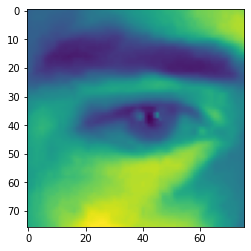

In [18]:
plt.imshow(imread(open_eye_path))

In [19]:
os.listdir(train_path+'close eyes')[5]

's0002_00169_0_0_0_0_0_01.png'

In [20]:
close_eye_path = train_path+'close eyes/'+'s0016_01506_1_0_0_0_1_01.png'

In [21]:
imread(close_eye_path).shape

(158, 158)

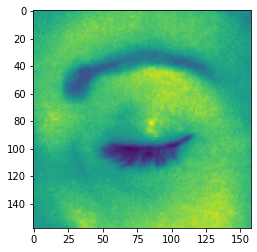

In [22]:
plt.imshow(imread(close_eye_path))

In [23]:
#check how many image in train
len(os.listdir(train_path+'open eyes'))

40948

In [24]:
#check how many image in test
len(os.listdir(train_path+'close eyes'))

39942

In [25]:
#test_path = /content/drive/MyDrive/drowsing/test dataset/
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'open eyes'):
    img  = imread(test_path+'open eyes/'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [26]:
#dim1

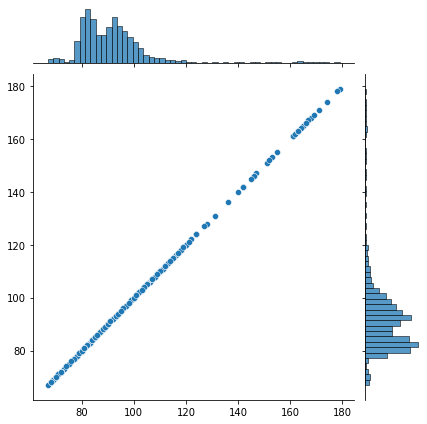

In [27]:
sns.jointplot(x=dim1,y=dim2)

In [28]:
np.mean(dim1)

91.1312375249501

In [29]:
np.mean(dim2)

91.1312375249501

In [30]:
image_shape = (91,91,3)

In [31]:
91*91*3

24843

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
imread(open_eye_path).max()

0.78039217

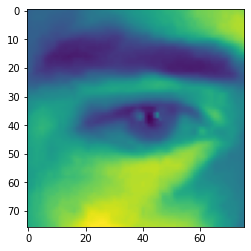

In [34]:
para_img = imread(open_eye_path)
plt.imshow(para_img)

In [35]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               
                              )

In [36]:
#plt.imshow(image_gen.random_transform(open_eye_path))

In [37]:
image_gen.flow_from_directory(train_path)

Found 80890 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 4008 images belonging to 2 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [40]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape= image_shape,activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape= image_shape,activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape= image_shape,activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 89, 89, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [44]:
batch_size=18
image_shape 

(91, 91, 3)

In [45]:
image_shape[:2]

(91, 91)

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                                color_mode='rgb',batch_size=batch_size,
                                                class_mode='binary'
                                               )

Found 80890 images belonging to 2 classes.


In [47]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                                color_mode='rgb',batch_size=batch_size,
                                                class_mode='binary',shuffle=False
                                               )

Found 4008 images belonging to 2 classes.


In [48]:
train_image_gen.class_indices

{'close eyes': 0, 'open eyes': 1}

In [49]:
results = model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/20
4494/4494 [==============================] - 831s 185ms/step - loss: 0.2245 - accuracy: 0.9104 - val_loss: 0.4202 - val_accuracy: 0.8493
Epoch 2/20
4494/4494 [==============================] - 815s 181ms/step - loss: 0.1003 - accuracy: 0.9649 - val_loss: 0.3736 - val_accuracy: 0.8770
Epoch 3/20
4494/4494 [==============================] - 828s 184ms/step - loss: 0.0796 - accuracy: 0.9725 - val_loss: 0.2074 - val_accuracy: 0.9232
Epoch 4/20
4494/4494 [==============================] - 813s 181ms/step - loss: 0.0703 - accuracy: 0.9752 - val_loss: 0.2085 - val_accuracy: 0.9227
Epoch 5/20
4494/4494 [==============================] - 787s 175ms/step - loss: 0.0665 - accuracy: 0.9771 - val_loss: 0.3208 - val_accuracy: 0.8835


In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save('drowsinessModel2.h5')

In [52]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.224538,0.910384,0.420213,0.849301
1,0.100317,0.964891,0.373639,0.876996
2,0.079599,0.972518,0.207392,0.923154
3,0.070327,0.975189,0.208549,0.922655
4,0.066509,0.977129,0.320812,0.883483


In [53]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

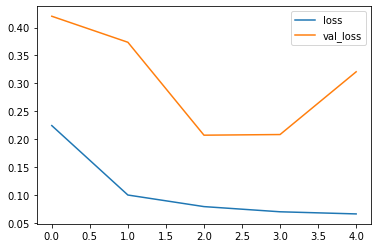

In [54]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

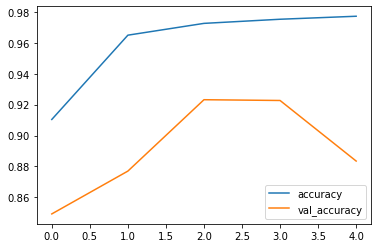

In [55]:
losses[['accuracy','val_accuracy']].plot()

In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
model.evaluate(test_image_gen)

223/223 [==============================] - 17s 74ms/step - loss: 0.3067 - accuracy: 0.8900


[0.3066631257534027, 0.889970064163208]

In [ ]:
#model = load_model('/content/drive/MyDrive/Colab Notebooks/drowsinessModel.h5')

In [60]:
model.evaluate(test_image_gen)

223/223 [==============================] - 16s 68ms/step - loss: 0.3028 - accuracy: 0.8855


[0.30280277132987976, 0.8854790329933167]

In [61]:
model.metrics_names

['loss', 'accuracy']

In [62]:
from tensorflow.keras.preprocessing import image

In [63]:
pred_probabilities = model.predict(test_image_gen)

In [64]:
pred_probabilities

array([[1.4203787e-04],
       [4.4092536e-04],
       [1.3423868e-05],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [65]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
predictions = pred_probabilities > 0.7

In [67]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2004
           1       0.99      0.71      0.83      2004

    accuracy                           0.85      4008
   macro avg       0.89      0.85      0.85      4008
weighted avg       0.89      0.85      0.85      4008



In [71]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1995,    9],
       [ 575, 1429]], dtype=int64)

In [72]:
os.listdir(test_path+'open eyes')[5]

's0001_01847_0_0_1_0_0_01.png'

In [73]:
close_eye_path_test = test_path+'open eyes/'+'s0001_01847_0_0_1_0_0_01.png'

In [74]:
close_eye_path_test

'C:\\Users\\Asus\\Downloads\\Compressed\\mrlEyes_2018_01\\prepare data/test/open eyes/s0001_01847_0_0_1_0_0_01.png'

In [75]:
my_image = image.load_img(close_eye_path_test,target_size=image_shape)

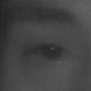

In [76]:
my_image

In [77]:
type(my_image)

PIL.Image.Image

In [78]:
my_image = image.img_to_array(my_image)

In [79]:
my_image.shape

(91, 91, 3)

In [80]:
my_image = np.expand_dims(my_image, axis=0)

In [81]:
my_image.shape

(1, 91, 91, 3)

In [82]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [83]:
train_image_gen.class_indices

{'close eyes': 0, 'open eyes': 1}

In [84]:
#second test for image
mysecondImage = image.load_img(r'C:\Users\Asus\Downloads\Compressed\mrlEyes_2018_01\prepare data\Capture.PNG',target_size=image_shape)

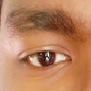

In [85]:
mysecondImage

In [86]:
mysecondImage=np.expand_dims(mysecondImage, axis=0)

In [87]:
mysecondImage.shape

(1, 91, 91, 3)

In [88]:
model.predict(mysecondImage)

array([[1.]], dtype=float32)

In [89]:
train_image_gen.class_indices

{'close eyes': 0, 'open eyes': 1}

In [ ]:
# thrid image open eyes
myOpenImage = image.load_img('/content/drive/MyDrive/Colab Notebooks/_4.jpg',target_size=image_shape)

In [ ]:
myOpenImage

In [ ]:
myOpenImage=np.expand_dims(myOpenImage, axis=0)

In [ ]:
myOpenImage.shape

In [ ]:
model.predict(myOpenImage)

In [ ]:
train_image_gen.class_indices

In [ ]:
# thrid image open eyes
myOpenImage = image.load_img('/content/drive/MyDrive/Colab Notebooks/_14.jpg',target_size=image_shape)

In [ ]:
myOpenImage

In [ ]:
myOpenImage=np.expand_dims(myOpenImage, axis=0)

In [ ]:
model.predict(myOpenImage)

In [ ]:
import cv2
from cv2 import VideoCapture

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'/content/drive/MyDrive/Colab Notebooks/haarcascade_eye_tree_eyeglasses.xml')

In [ ]:
!pip install pygame
from pygame import mixer

In [ ]:
mixer.init()
sound = mixer.Sound('alarm.wav')
cap = cv2.VideoCapture(0)
Score=0;
while True:
    ret,frame = cap.read();
    height,width = frame.shape[0:2]
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    faces= faceCascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=3)
    eyes= eyeCascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=2)
    
    cv2.rectangle(frame, (0,height-50),(200,height),(0,0,0),thickness=cv2.FILLED)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,pt1=(x,y),pt2=(x+w,y+h),color=(0,255,0),thickness=3)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(frame,pt1=(ex,ey),pt2=(ex+ew,ey+eh),color=(0,255,0),thickness=3)
        # preprocessing steps
        eye= frame[ey:ey+eh,ex:ex+w]
        
        eye= cv2.resize(eye,(73,73))
        
        eye= eye/255
        eye= eye.reshape(73,73,3)
       
        eye= np.expand_dims(eye,axis=0)
        
        # preprocessing is done now model prediction
        prediction = model.predict(eye)
        #print(prediction)
        
        
         # if eyes are closed
        if prediction[0][0]>0.3 and prediction[0][0]<1:
            cv2.putText(frame,'closed',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score=Score+1
            if(Score>15):
                try:
                    sound.play()
                except:
                    pass
         # if eyes are open
        elif prediction[0][0]>=1:
            cv2.putText(frame,'open',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)      
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score = Score-1
            if (Score<0):
                Score=0
        
        
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(33) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()